In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow / Keras for deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, applications

# Sklearn for metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Useful for OS and file handling
from pathlib import Path
import os

# The base path for the dataset
train_dir = "/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/train"
val_dir   = "/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val"


In [11]:
img_size = (224, 224)
batch_size = 32

#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, #Normalizing the pixels to a uniform range
    rotation_range=20, #Rotating the images by 20 degree
    zoom_range=0.15, #Random zooming by 15%
    width_shift_range=0.1, #Shifting the image by width
    height_shift_range=0.1, #Shifting the image vertically
    horizontal_flip=True #Mirroring the image
)

val_datagen = ImageDataGenerator(rescale=1./255) #Normalizing the validation data

#Converting the data to RGB, resizing the image to (224, 224)
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

Found 8116 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [12]:
print(train_gen.class_indices) #Mapping the target class to 0 and 1

{'benign': 0, 'malignant': 1}


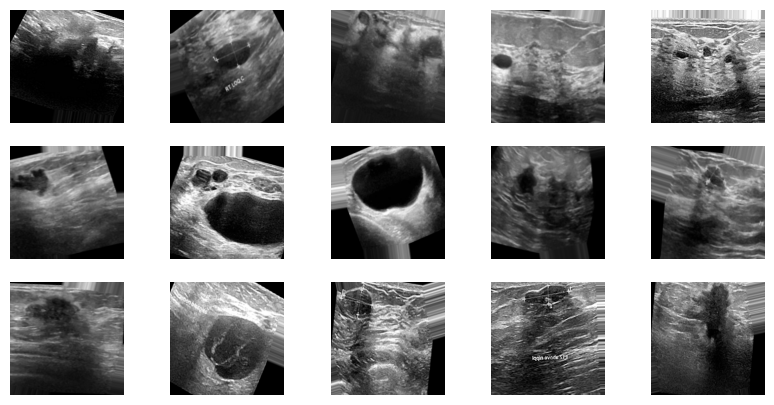

In [13]:
# Sample images after data preprocessing
x, y = next(train_gen)

plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(x[i])
    plt.axis("off")
plt.show()

In [14]:
# Plot training vs validation curves
def plot_history(history, title):
    plt.figure(figsize=(10,4))
    
    # Accuracy curve
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="Train")
    plt.plot(history.history["val_accuracy"], label="Validation")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Loss curve
    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="Train")
    plt.plot(history.history["val_loss"], label="Validation")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.show()


# Full evaluation block
def evaluate_model(model, model_name):
    
    # True labels
    y_true = val_gen.classes
    
    # Predicted probabilities
    y_prob = model.predict(val_gen)
    
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)
    
    # Print classification report
    print(f"\n{model_name} Classification Report")
    print(classification_report(y_true, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Benign","Malignant"],
                yticklabels=["Benign","Malignant"],
                cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{model_name} AUC={roc_auc:.3f}")
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()
    
    # Return metrics for comparison
    report = classification_report(y_true, y_pred, output_dict=True)
    
    return {
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1": report["1"]["f1-score"],
        "AUC": roc_auc
    }

### Model 1- VGG19

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 113s 434ms/step - accuracy: 0.5490 - loss: 0.6932 - val_accuracy: 0.7244 - val_loss: 0.5895
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 108s 425ms/step - accuracy: 0.6557 - loss: 0.6219 - val_accuracy: 0.7778 - val_loss: 0.5418
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 106s 418ms/step - accuracy: 0.7035 - loss: 0.5808 - val_accuracy: 0.7800 - val_loss: 0.5157
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 109s 430ms/step - accuracy: 0.7345 - loss: 0.5505 - val_accuracy: 0.7833 - val_loss: 0.4980
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 108s 424ms/step - accuracy: 0.7506 - loss: 0.5314 - val_accuracy: 0.7900 - val_loss: 0.4848
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 109s 429ms/step - accuracy: 0.7562 - loss: 0.5166 - val_accuracy: 0.7922 - val_loss: 0.4733
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 107s 421ms/step - accuracy: 0.7685 - loss: 0.4968 - val_accuracy: 0.7922 - val_loss: 0.4643
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 107s 420ms/step - accuracy: 0.7783 -

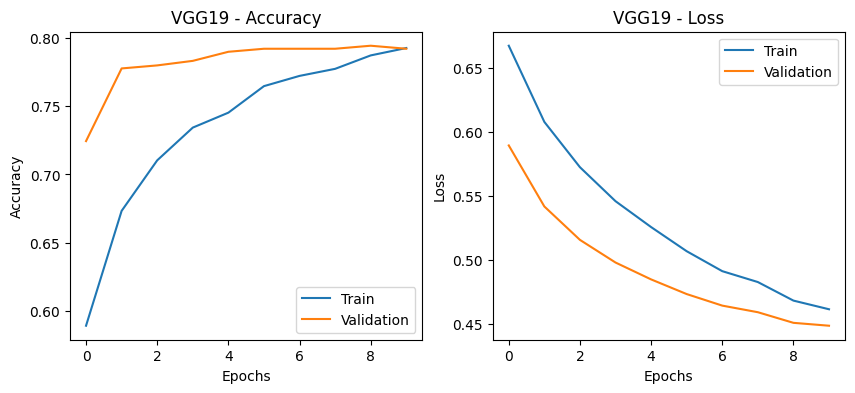

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step

VGG19 Classification Report
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       500
           1       0.81      0.69      0.75       400

    accuracy                           0.79       900
   macro avg       0.80      0.78      0.79       900
weighted avg       0.79      0.79      0.79       900



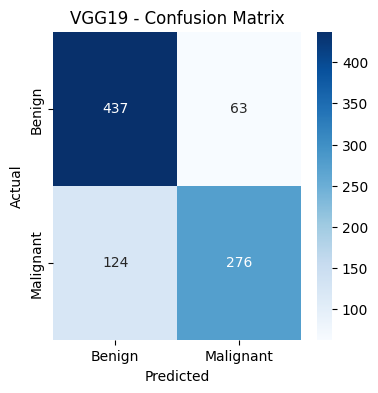

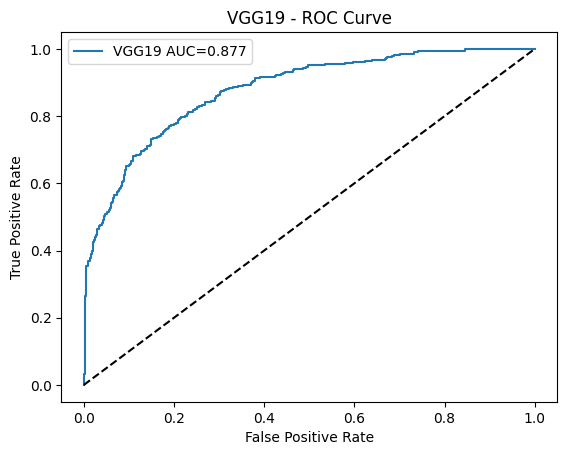

In [15]:
# Load pretrained backbone
base = tf.keras.applications.VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze convolution layers
base.trainable = False

# Build full model
vgg_model = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
vgg_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train
history_vgg = vgg_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

# Plots and metrics
plot_history(history_vgg, "VGG19")
res_vgg = evaluate_model(vgg_model, "VGG19")

### Model 2- DenseNet121

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 157s 518ms/step - accuracy: 0.6169 - loss: 0.6698 - val_accuracy: 0.8133 - val_loss: 0.4168
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 100s 393ms/step - accuracy: 0.7786 - loss: 0.4550 - val_accuracy: 0.8267 - val_loss: 0.3750
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 98s 386ms/step - accuracy: 0.8189 - loss: 0.4105 - val_accuracy: 0.8378 - val_loss: 0.3546
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 98s 386ms/step - accuracy: 0.8232 - loss: 0.3887 - val_accuracy: 0.8578 - val_loss: 0.3264
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 98s 384ms/step - accuracy: 0.8400 - loss: 0.3703 - val_accuracy: 0.8622 - val_loss: 0.3243
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 97s 382ms/step - accuracy: 0.8432 - loss: 0.3653 - val_accuracy: 0.8689 - val_loss: 0.3226
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 98s 384ms/step - accuracy: 0.8435 - loss: 0.3497 - val_accuracy: 0.8689 - val_loss: 0.3150
Epoch 8/10
254/254 ━━━━━━━━━━━

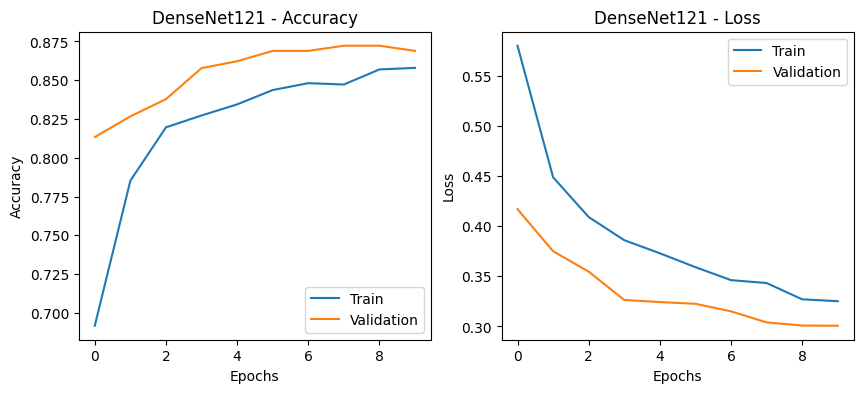

29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 484ms/step

DenseNet121 Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       500
           1       0.85      0.85      0.85       400

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900



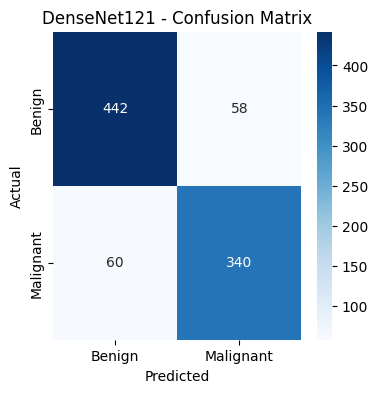

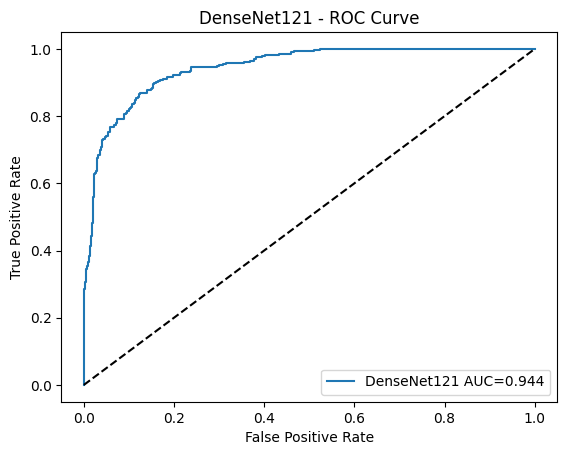

In [16]:
base = tf.keras.applications.DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base.trainable = False

dense_model = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

dense_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_dense = dense_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

plot_history(history_dense, "DenseNet121")
res_dense = evaluate_model(dense_model, "DenseNet121")

### Model 3- EfficientNetB0

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


2026-02-08 06:26:05.251607: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:26:05.395565: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:26:05.743726: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:26:05.884823: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:26:06.592105: E external/local_xla/xla/stream_

224/254 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.5035 - loss: 0.7024

2026-02-08 06:27:41.027918: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:27:41.169278: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:27:41.496435: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:27:41.637119: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:27:42.335028: E external/local_xla/xla/stream_

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.5034 - loss: 0.7021

2026-02-08 06:28:12.301823: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:28:12.437153: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:28:12.747044: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:28:12.888691: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 06:28:13.578771: E external/local_xla/xla/stream_

254/254 ━━━━━━━━━━━━━━━━━━━━ 149s 490ms/step - accuracy: 0.5034 - loss: 0.7020 - val_accuracy: 0.4600 - val_loss: 0.6959
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 96s 376ms/step - accuracy: 0.5002 - loss: 0.6960 - val_accuracy: 0.5556 - val_loss: 0.6892
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 96s 378ms/step - accuracy: 0.4985 - loss: 0.6948 - val_accuracy: 0.5556 - val_loss: 0.6910
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 95s 374ms/step - accuracy: 0.5024 - loss: 0.6935 - val_accuracy: 0.5556 - val_loss: 0.6874
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 96s 377ms/step - accuracy: 0.5217 - loss: 0.6919 - val_accuracy: 0.5556 - val_loss: 0.6916
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 96s 376ms/step - accuracy: 0.5049 - loss: 0.6940 - val_accuracy: 0.4522 - val_loss: 0.6933
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 97s 382ms/step - accuracy: 0.5099 - loss: 0.6930 - val_accuracy: 0.4600 - val_loss: 0.6949
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 96s 379ms/step - accuracy: 0.5137 - loss: 0.6933 - va

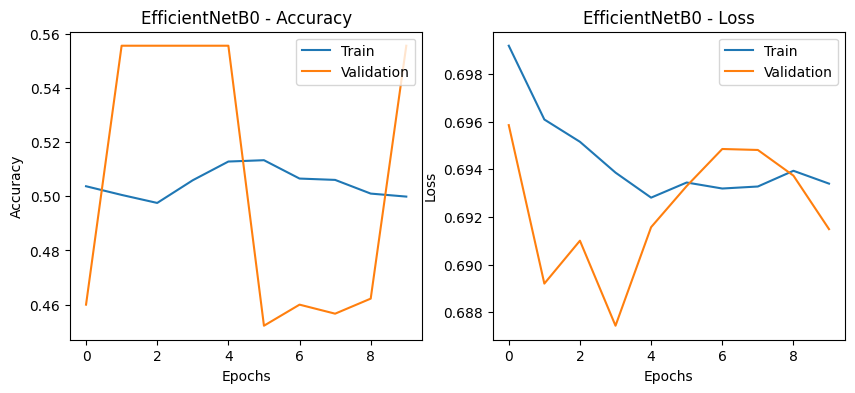

29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 306ms/step

EfficientNetB0 Classification Report
              precision    recall  f1-score   support

           0       0.56      1.00      0.71       500
           1       0.00      0.00      0.00       400

    accuracy                           0.56       900
   macro avg       0.28      0.50      0.36       900
weighted avg       0.31      0.56      0.40       900



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


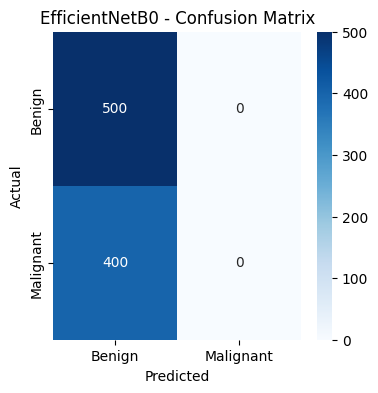

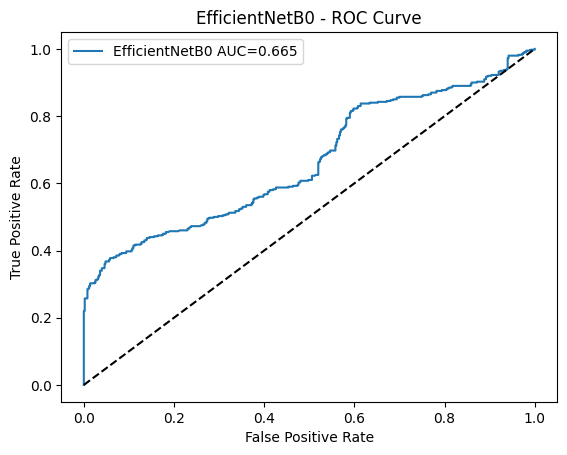

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
base = tf.keras.applications.EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base.trainable = False

eff_model = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

eff_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_eff = eff_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

plot_history(history_eff, "EfficientNetB0")
res_eff = evaluate_model(eff_model, "EfficientNetB0")

### Model 4- InceptionV3

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 133s 463ms/step - accuracy: 0.7174 - loss: 0.5478 - val_accuracy: 0.8333 - val_loss: 0.3810
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 97s 382ms/step - accuracy: 0.8205 - loss: 0.3999 - val_accuracy: 0.8522 - val_loss: 0.3516
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 98s 385ms/step - accuracy: 0.8326 - loss: 0.3669 - val_accuracy: 0.7767 - val_loss: 0.4296
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 97s 382ms/step - accuracy: 0.8434 - loss: 0.3539 - val_accuracy: 0.8878 - val_loss: 0.3059
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 98s 385ms/step - accuracy: 0.8504 - loss: 0.3308 - val_accuracy: 0.8511 - val_loss: 0.3236
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 98s 385ms/step - accuracy: 0.8607 - loss: 0.3159 - val_accuracy: 0.8500 - val_loss: 0.3247
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 98s 387ms/step - accuracy: 0.8644 - loss: 0.3045 - val_accuracy: 0.8922 - val_loss: 0.2658
Epoch 8/10
254/254 ━━━━━━━━━━━━

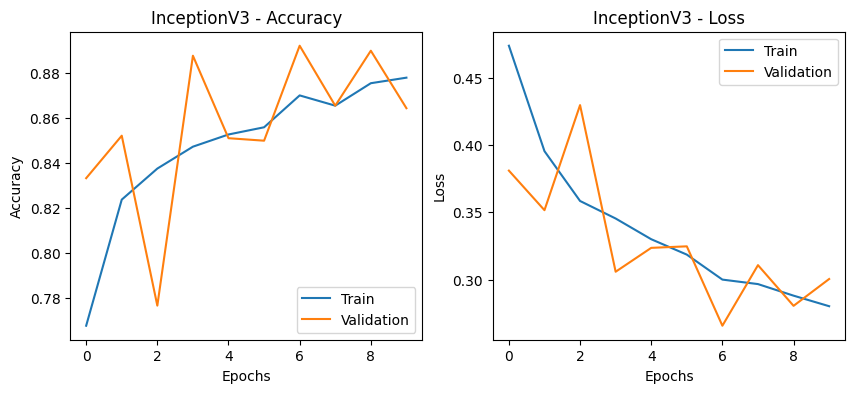

29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step

InceptionV3 Classification Report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       500
           1       0.96      0.72      0.83       400

    accuracy                           0.86       900
   macro avg       0.89      0.85      0.86       900
weighted avg       0.88      0.86      0.86       900



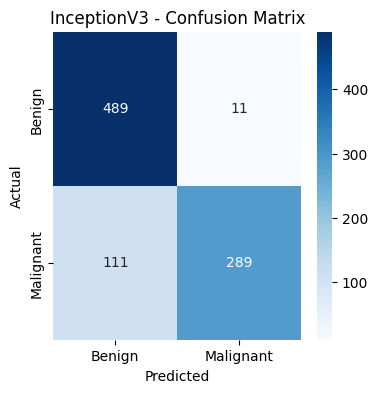

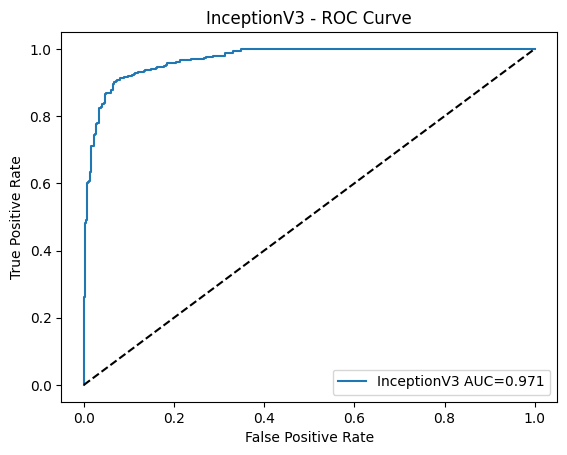

In [18]:
base = tf.keras.applications.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base.trainable = False

inc_model = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

inc_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_inc = inc_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

plot_history(history_inc, "InceptionV3")
res_inc = evaluate_model(inc_model, "InceptionV3")

In [19]:
# Create result dataframe
df_results = pd.DataFrame([
    res_vgg,
    res_dense,
    res_eff,
    res_inc
])

df_results

,Model,Accuracy,Precision,Recall,F1,AUC
0,VGG19,0.792222,0.814159,0.6900,0.746955,0.876960
1,DenseNet121,0.868889,0.854271,0.8500,0.852130,0.943955
2,EfficientNetB0,0.555556,0.000000,0.0000,0.000000,0.664745
3,InceptionV3,0.864444,0.963333,0.7225,0.825714,0.970595


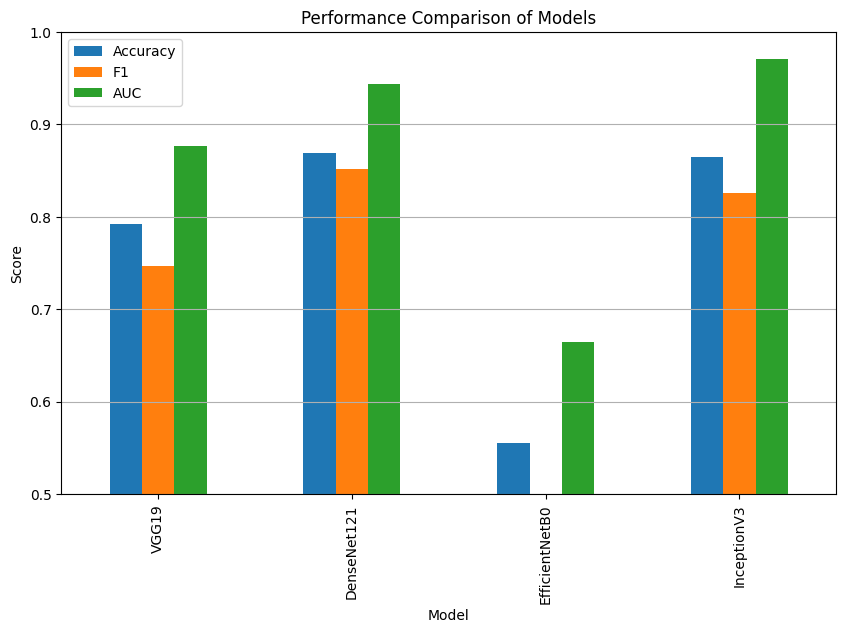

In [20]:
df_results.set_index("Model")[["Accuracy","F1","AUC"]].plot(
    kind="bar",
    figsize=(10,6)
)

plt.ylim(0.5,1.0)
plt.ylabel("Score")
plt.title("Performance Comparison of Models")
plt.grid(axis="y")
plt.show()

### Selecting our best model as DenseNet121

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


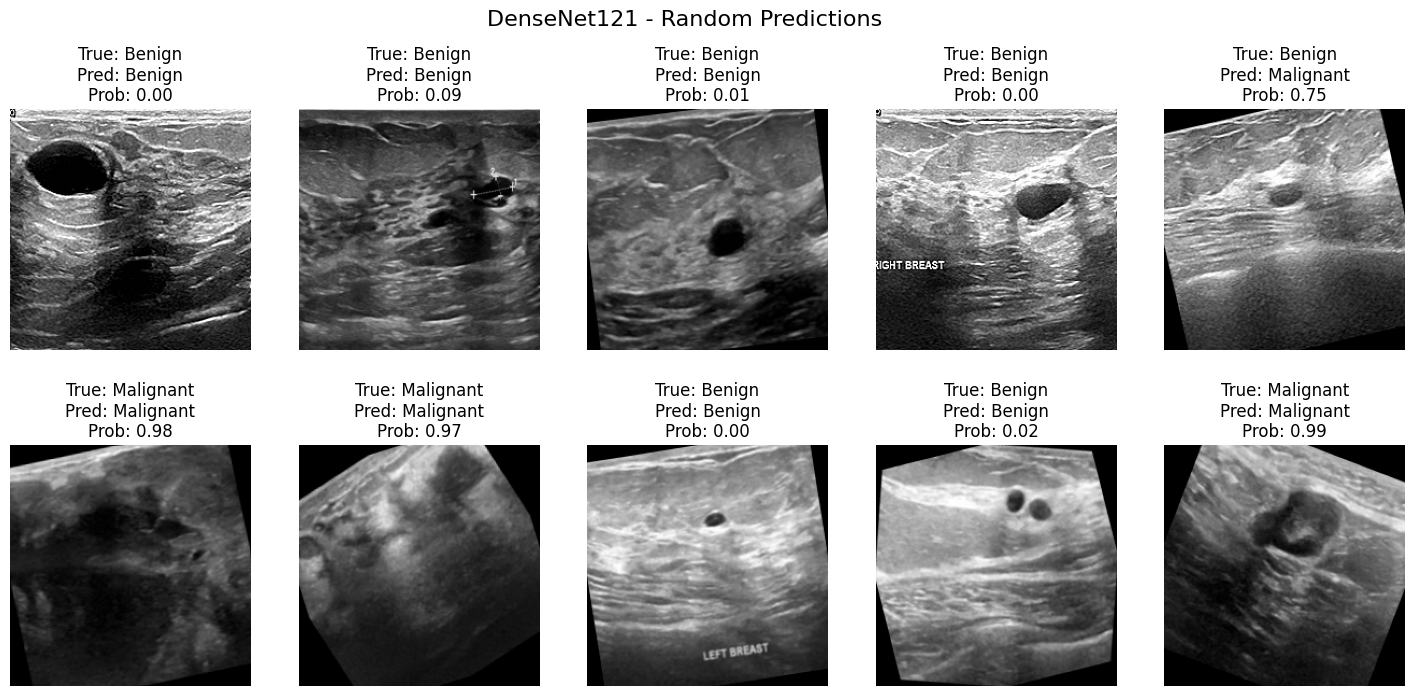

In [25]:
import random
from tensorflow.keras.preprocessing import image

# Path to validation folder
val_path = "/kaggle/input/ultrasound-breast-images-for-breast-cancer/ultrasound breast classification/val"

# Class names
class_names = ["Benign", "Malignant"]

# Collect all image paths
all_images = []
for cls in class_names:
    cls_folder = os.path.join(val_path, cls.lower())
    for img in os.listdir(cls_folder):
        all_images.append((os.path.join(cls_folder, img), cls))

# Pick 5 random images
sample_images = random.sample(all_images, 10)

plt.figure(figsize=(18,8))

for i, (img_path, true_label) in enumerate(sample_images):
    
    # Load and preprocess
    img = image.load_img(img_path, target_size=(224,224))
    img_arr = image.img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)
    
    # Predict
    pred_prob = dense_model.predict(img_arr)[0][0]
    pred_label = "Malignant" if pred_prob > 0.5 else "Benign"
    
    # Plot
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {true_label}\nPred: {pred_label}\nProb: {pred_prob:.2f}")

plt.suptitle("DenseNet121 - Random Predictions", fontsize=16)
plt.show()